V = 0:
t >  |     x >         |            v >     |       v (km/h)>
0.98 4.802076776624152 -0.00583122842216967 -0.02099242231981081

X = 0:
t >  |     x >              |       v >        |    v (km/h)>
1.98 -0.0006069529708038739 -9.418368135831567 -33.90612528899364



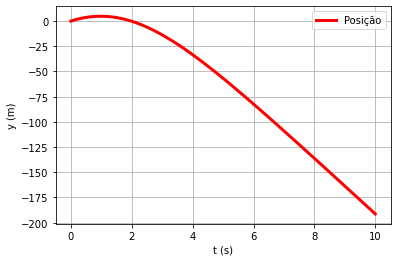

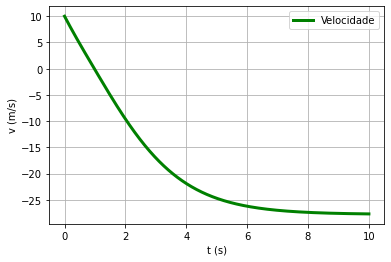

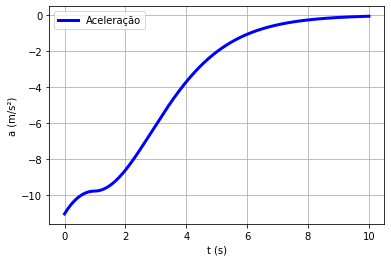

In [1]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

# Gravidade
g = 9.8

# Tempo inicial e final
ti = 0
tf = 10

# Velocidade inicial
x0 = 0
v0 = 10

# Velocidade terminal
vt = 100 * 1000 / 3600

# Aceleração
D = g / (vt * np.abs(vt))

# dt incremento do tempo e n numero de intervalos
dt = 0.001
n = int((tf - ti) / dt)

# Vetor tempo (n+1 para garantir que nao falta o ultimo dado (Ex: t[10]))
t = np.linspace(ti, tf, n + 1)

# Vetor velocidade (empty e não zeros para não alterar 
# muito o resultado se faltar analisar um dado)
a = np.empty(n + 1)
v = np.empty(n + 1)
x = np.empty(n + 1)

# Introduzir v0 no vetor velocidade
v[0] = v0
x[0] = x0

# Preencher o vetor v
for i in range(n):
    # v0 aqui é a velocidade inicial desde o ultimo ponto
    #   v    =  v0  + a * t
    a[i] = - D * v[i] * np.abs(v[i]) - g
    v[i + 1] = v[i] + a[i] * dt
    x[i + 1] = x[i] + v[i] * dt
    
    
# SÓ CÁ ESTÁ PARA FAZER O GRÁFICO DA ACELERAÇÃO BONITO
# TIRAR ANTES DO TESTE OU DEUS TENHA PIEDADE QUE EU ATIRO-ME DA JANELA
a[-1] = a[-2]
    
    
# Se t[i] estiver entre o tempo pretendido - incremento
#                       e tempo pretendido + incremento
for i in range(n):
    if (v[i] > (0 - dt) and v[i + 1] < (0 + dt)):
        print("V = 0:")
        print("t >  |     x >         |            v >     |       v (km/h)>")
        print(t[i + 1], x[i + 1], v[i + 1], v[i + 1] * 3600 / 1000)
        print("")
        break
    
    
for i in range(n):
    if (x[i] > (0 - dt) and x[i + 1] < (0 + dt)):
        print("X = 0:")
        print("t >  |     x >              |       v >        |    v (km/h)>")
        print(t[i + 1], x[i + 1], v[i + 1], v[i + 1] * 3600 / 1000)
        print("")
        break



    
    
    
# Plot
plt.plot(t, x, label="Posição",  linestyle='-', linewidth=3, color="red")
plt.ylabel("y (m)")
plt.xlabel("t (s)")
plt.legend()         # Legenda só aparece com isto
plt.grid()
plt.show()

plt.plot(t, v, label="Velocidade",  linestyle='-', linewidth=3, color="green")
plt.ylabel("v (m/s)")
plt.xlabel("t (s)")
plt.legend()         # Legenda só aparece com isto
plt.grid()
plt.show()

plt.plot(t, a, label="Aceleração",  linestyle='-', linewidth=3, color="blue")
plt.ylabel("a (m/s²)")
plt.xlabel("t (s)")
plt.legend()         # Legenda só aparece com isto
plt.grid()
plt.show()
